<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/05.%20Week%205/Assignment/02_DeepLearning_Task_2__Week_5_RNN%2CLSTM%2C_GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow
#!pip install scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Tensorflow

###Data Preparation

In [3]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [4]:
df['Review Text'] = df['Review Text'].astype(str)
df['Review Text'] = df['Review Text'].str.lower()
df['sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))
df = df.dropna(subset=['sentiment'])
df['sentiment'] = df['sentiment'].astype(int)

In [5]:
num_words = 10000
maxlen = 200

In [6]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['Review Text'])
sequences = tokenizer.texts_to_sequences(df['Review Text'])
x = pad_sequences(sequences, maxlen=maxlen)
y = df['sentiment'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###RNN

Pemodelan RNN

In [8]:
def rnn_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        SimpleRNN(hidden_size, dropout=0.3, recurrent_dropout=0.3, return_sequences=False),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimzer

In [9]:
rnn_model = rnn_model(num_words)
rnn_optimizer = Adam(learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training data 😀😀😀

In [10]:
def train_rnn_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(optimizer=rnn_optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Train the model
trained_rnn, rnn_history = train_rnn_model(rnn_model, x_train, y_train, x_test, y_test)

# Evaluate
loss, accuracy = trained_rnn.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7623 - loss: 1.0451 - val_accuracy: 0.8824 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8862 - loss: 0.4243 - val_accuracy: 0.8824 - val_loss: 0.3794 - learning_rate: 0.0010
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8778 - loss: 0.3892 - val_accuracy: 0.8824 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8841 - loss: 0.3638 - val_accuracy: 0.8824 - val_loss: 0.3454 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8846 - loss: 0.3422 - val_accuracy: 0.8824 - val_loss: 0.3307 - learning_rate: 0.0010
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8828 - loss: 0.3282 - val_accuracy: 0.8824 - val_loss: 0.3402 - learning_rate: 0.0010
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8861 - loss

###LSTM

Modeling data LSTM

In [11]:
def lstm_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        LSTM(hidden_size, dropout=0.3, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [12]:
lstm_model = lstm_model(num_words)
lstm_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [13]:
def train_lstm_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(optimizer=lstm_optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Train the model
print("\nTraining LSTM model...")
trained_lstm, lstm_history = train_lstm_model(lstm_model, x_train, y_train, x_test, y_test)


Training LSTM model...
Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8772 - loss: 0.3544 - val_accuracy: 0.9134 - val_loss: 0.1926 - learning_rate: 0.0010
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9427 - loss: 0.1530 - val_accuracy: 0.9379 - val_loss: 0.1748 - learning_rate: 0.0010
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9603 - loss: 0.1092 - val_accuracy: 0.9335 - val_loss: 0.1759 - learning_rate: 0.0010
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9729 - loss: 0.0861 - val_accuracy: 0.9297 - val_loss: 0.2018 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9263 - val_loss: 0.2584 - learning_rate: 5.0000e-04


###GRU

Modeling data GRU

In [14]:
def gru_model(vocab_size, embed_size=64, hidden_size=64):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        Bidirectional(GRU(hidden_size, dropout=0.2, return_sequences=True)),
        GlobalAveragePooling1D(),  # Lebih ringan daripada GRU kedua
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [15]:
gru_model = gru_model(num_words, embed_size=128, hidden_size=128)
gru_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [16]:
def train_gru_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(
        optimizer=gru_optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6, verbose=1),
        ModelCheckpoint('best_gru_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1,
    )

    return model, history

# Train and evaluate the GRU model
print("\nTraining GRU model...")
trained_gru, gru_history = train_gru_model(gru_model, x_train, y_train, x_test, y_test)
loss, accuracy, precision, recall = trained_gru.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Training GRU model...
Epoch 1/10
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8767 - loss: 0.3931 - precision: 0.8846 - recall: 0.9899

258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8768 - loss: 0.3928 - precision: 0.8846 - recall: 0.9900 - val_accuracy: 0.8824 - val_loss: 0.2893 - val_precision: 0.8824 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/10
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9067 - loss: 0.2344 - precision: 0.9242 - recall: 0.9747

258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9069 - loss: 0.2340 - precision: 0.9245 - recall: 0.9747 - val_accuracy: 0.9231 - val_loss: 0.1765 - val_precision: 0.9663 - val_recall: 0.9458 - learning_rate: 0.0010
Epoch 3/10
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9512 - loss: 0.1358 - precision: 0.9686 - recall: 0.9764

258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9512 - loss: 0.1358 - precision: 0.9686 - recall: 0.9763 - val_accuracy: 0.9379 - val_loss: 0.1585 - val_precision: 0.9509 - val_recall: 0.9802 - learning_rate: 0.0010
Epoch 4/10
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9644 - loss: 0.0989 - precision: 0.9793 - recall: 0.9805

258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9644 - loss: 0.0989 - precision: 0.9793 - recall: 0.9805 - val_accuracy: 0.9403 - val_loss: 0.1887 - val_precision: 0.9601 - val_recall: 0.9728 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9764 - loss: 0.0739 - precision: 0.9862 - recall: 0.9873 - val_accuracy: 0.9389 - val_loss: 0.1893 - val_precision: 0.9558 - val_recall: 0.9758 - learning_rate: 0.0010
Epoch 6/10
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9824 - loss: 0.0601 - precision: 0.9885 - recall: 0.9915
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9824 - loss: 0.0601 - precision: 0.9885 - recall: 0.9915 - val_accuracy: 0.9355 - val_loss: 0.2391 - val_precision: 0.9607 - val_recall: 0.9665 - learning_rate: 0.0010
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1

###Evaluasi dari RNN, LSTM, dan GRU

Modeling evaluasi untuk RNN, LSTM, dan GRU

In [17]:
def evaluate_model(model, x_test, y_test, model_name):
    y_prob = model.predict(x_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Evaluation:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    plt.xticks([0,1], ['Negative', 'Positive'])
    plt.yticks([0,1], ['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')

    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

perbandingan antara RNN, LSTM, GRU

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

RNN Evaluation:
Accuracy: 0.8824
Precision: 0.8824
Recall: 1.0000
F1 Score: 0.9375
ROC AUC: 0.7382

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       485
    Positive       0.88      1.00      0.94      3638

    accuracy                           0.88      4123
   macro avg       0.44      0.50      0.47      4123
weighted avg       0.78      0.88      0.83      4123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


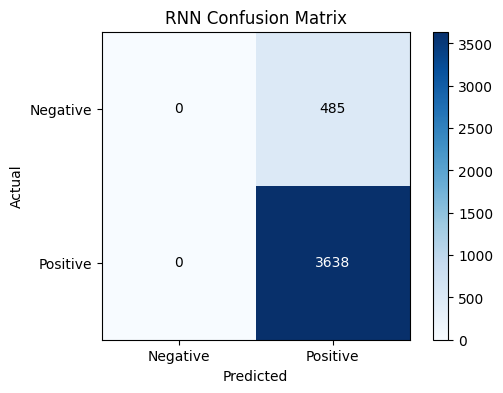

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

LSTM Evaluation:
Accuracy: 0.9362
Precision: 0.9513
Recall: 0.9777
F1 Score: 0.9643
ROC AUC: 0.9517

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.62      0.70       485
    Positive       0.95      0.98      0.96      3638

    accuracy                           0.94      4123
   macro avg       0.87      0.80      0.83      4123
weighted avg       0.93      0.94      0.93      4123



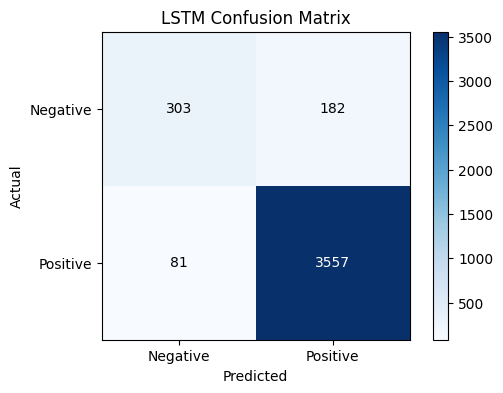

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

GRU Evaluation:
Accuracy: 0.9360
Precision: 0.9491
Recall: 0.9799
F1 Score: 0.9643
ROC AUC: 0.9621

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.61      0.69       485
    Positive       0.95      0.98      0.96      3638

    accuracy                           0.94      4123
   macro avg       0.88      0.79      0.83      4123
weighted avg       0.93      0.94      0.93      4123



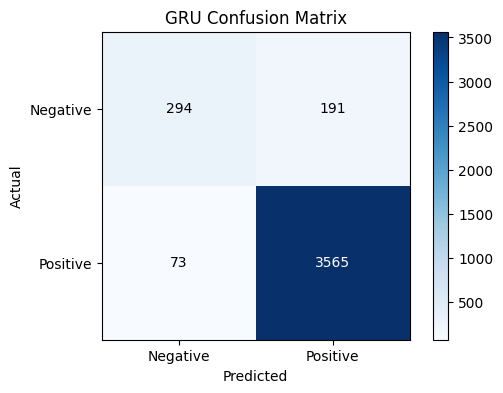

In [18]:
rnn_results = evaluate_model(rnn_model, x_test, y_test, 'RNN')
lstm_results = evaluate_model(lstm_model, x_test, y_test, 'LSTM')
gru_results = evaluate_model(gru_model, x_test, y_test, 'GRU')

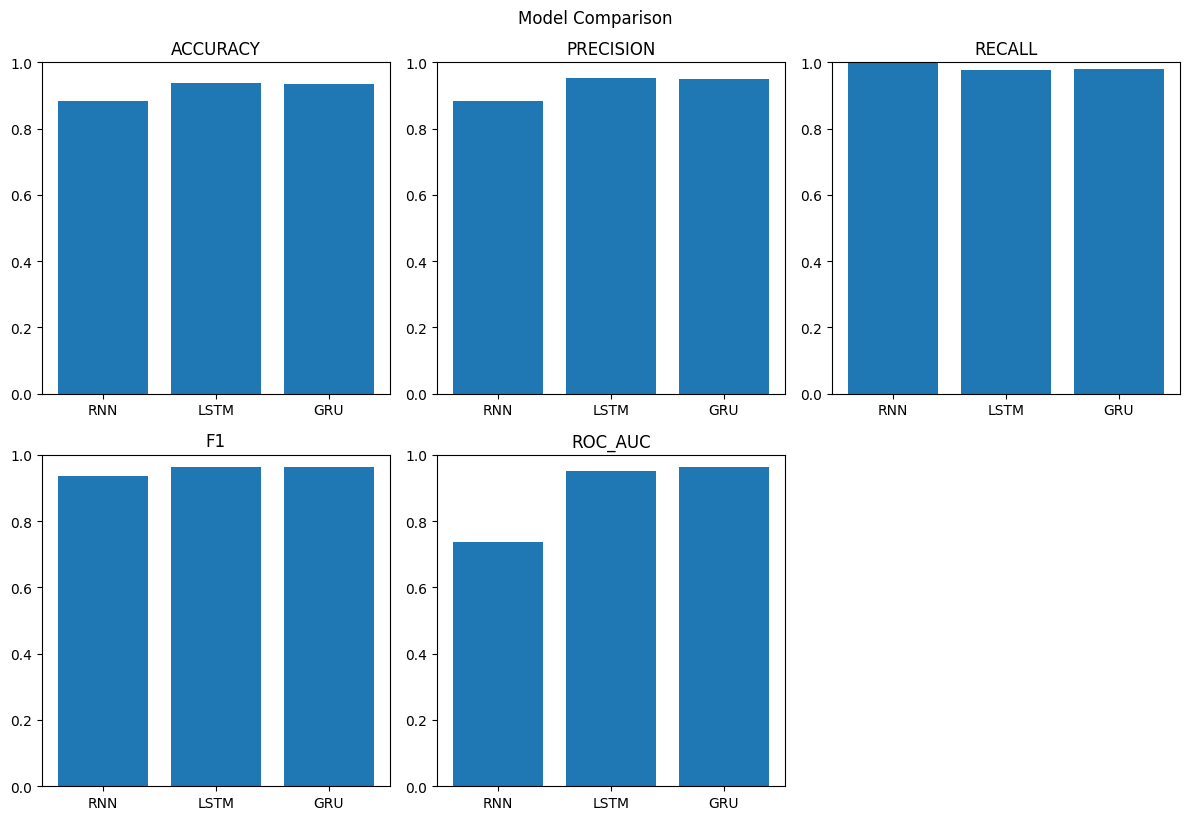

In [19]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {'RNN': rnn_results, 'LSTM': lstm_results, 'GRU': gru_results}

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(results.keys(), [results[model][metric] for model in results])
    plt.title(metric.upper())
    plt.ylim(0, 1)
plt.tight_layout()
plt.suptitle('Model Comparison', y=1.02)
plt.show()

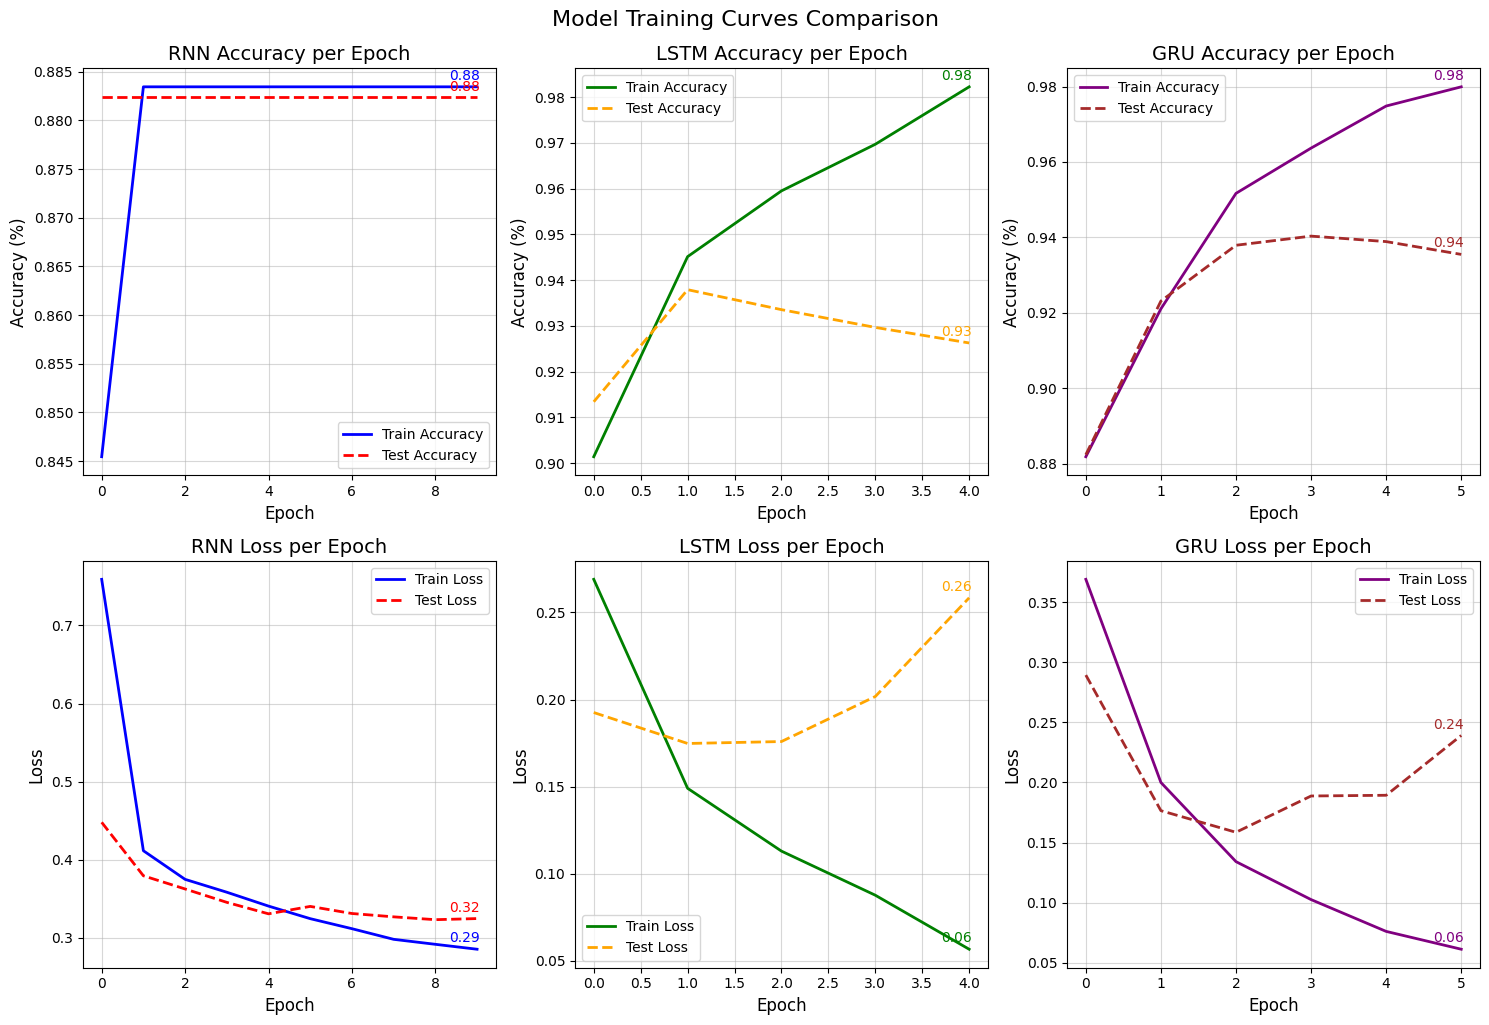

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# RNN Training Curves
plt.subplot(2, 3, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_accuracy'], '--', label='Test Accuracy', color='red', linewidth=2)
plt.title('RNN Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['accuracy']) - 1, rnn_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['val_accuracy']) - 1, rnn_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

plt.subplot(2, 3, 4)
plt.plot(rnn_history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_loss'], '--', label='Test Loss', color='red', linewidth=2)
plt.title('RNN Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['loss'][-1]:.2f}",
             xy=(len(rnn_history.history['loss']) - 1, rnn_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_loss'][-1]:.2f}",
             xy=(len(rnn_history.history['val_loss']) - 1, rnn_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

# LSTM Training Curves
plt.subplot(2, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(lstm_history.history['val_accuracy'], '--', label='Test Accuracy', color='orange', linewidth=2)
plt.title('LSTM Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['accuracy']) - 1, lstm_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['val_accuracy']) - 1, lstm_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

plt.subplot(2, 3, 5)
plt.plot(lstm_history.history['loss'], label='Train Loss', color='green', linewidth=2)
plt.plot(lstm_history.history['val_loss'], '--', label='Test Loss', color='orange', linewidth=2)
plt.title('LSTM Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['loss'][-1]:.2f}",
             xy=(len(lstm_history.history['loss']) - 1, lstm_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_loss'][-1]:.2f}",
             xy=(len(lstm_history.history['val_loss']) - 1, lstm_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

# GRU Training Curves
plt.subplot(2, 3, 3)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy', color='purple', linewidth=2)
plt.plot(gru_history.history['val_accuracy'], '--', label='Test Accuracy', color='brown', linewidth=2)
plt.title('GRU Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['accuracy']) - 1, gru_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['val_accuracy']) - 1, gru_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.subplot(2, 3, 6)
plt.plot(gru_history.history['loss'], label='Train Loss', color='purple', linewidth=2)
plt.plot(gru_history.history['val_loss'], '--', label='Test Loss', color='brown', linewidth=2)
plt.title('GRU Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['loss'][-1]:.2f}",
             xy=(len(gru_history.history['loss']) - 1, gru_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_loss'][-1]:.2f}",
             xy=(len(gru_history.history['val_loss']) - 1, gru_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.tight_layout()
plt.suptitle('Model Training Curves Comparison', fontsize=16, y=1.02)
plt.show()